# Importing the libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Reading the dataset 
dataset = pd.read_csv('medical_insurance.csv') 

# Exploratry Data Analysis

In [3]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [5]:
dataset.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
# Checking for null values
dataset.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
# Getting the name of columns
dataset.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

# Visualising our data

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

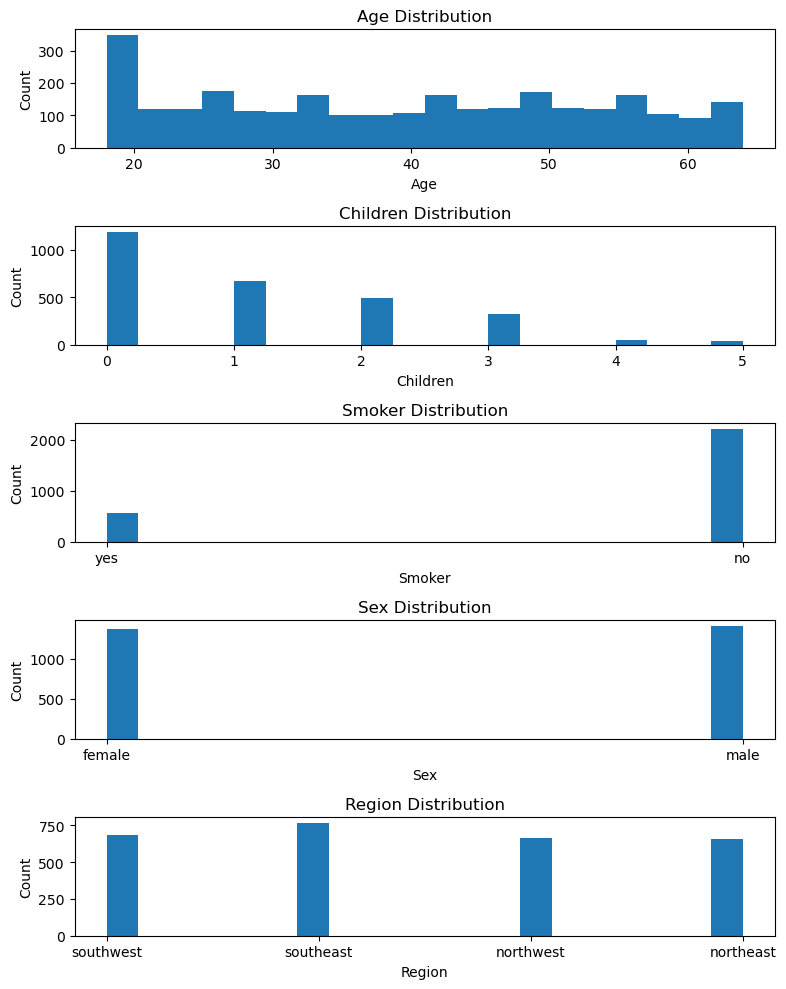

In [9]:
# Distribution of Demographic and Behavioral Characteristics
#Subplots with hist
fig, axs = plt.subplots(5, figsize=(8,10))

axs[0].hist(dataset['age'], bins=20)
axs[0].set_title('Age Distribution')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Count')

axs[1].hist(dataset['children'], bins=20)
axs[1].set_title('Children Distribution')
axs[1].set_xlabel('Children')
axs[1].set_ylabel('Count')

axs[2].hist(dataset['smoker'], bins=20)
axs[2].set_title('Smoker Distribution')
axs[2].set_xlabel('Smoker')
axs[2].set_ylabel('Count')

axs[3].hist(dataset['sex'], bins=20)
axs[3].set_title('Sex Distribution')
axs[3].set_xlabel('Sex')
axs[3].set_ylabel('Count')

axs[4].hist(dataset['region'], bins=20)
axs[4].set_title('Region Distribution')
axs[4].set_xlabel('Region')
axs[4].set_ylabel('Count')

plt.tight_layout()

plt.show()

In [10]:
smoker_charges = dataset[dataset["smoker"] == "yes"]["charges"]
non_smoker_charges = dataset[dataset["smoker"] == "no"]["charges"]

mean_smoker_charges = smoker_charges.mean()
mean_non_smoker_charges = non_smoker_charges.mean()

print(f"Mean charges for smokers: {mean_smoker_charges}")
print(f"Mean charges for non-smokers: {mean_non_smoker_charges}")

Mean charges for smokers: 32223.13976361701
Mean charges for non-smokers: 8417.874411140403


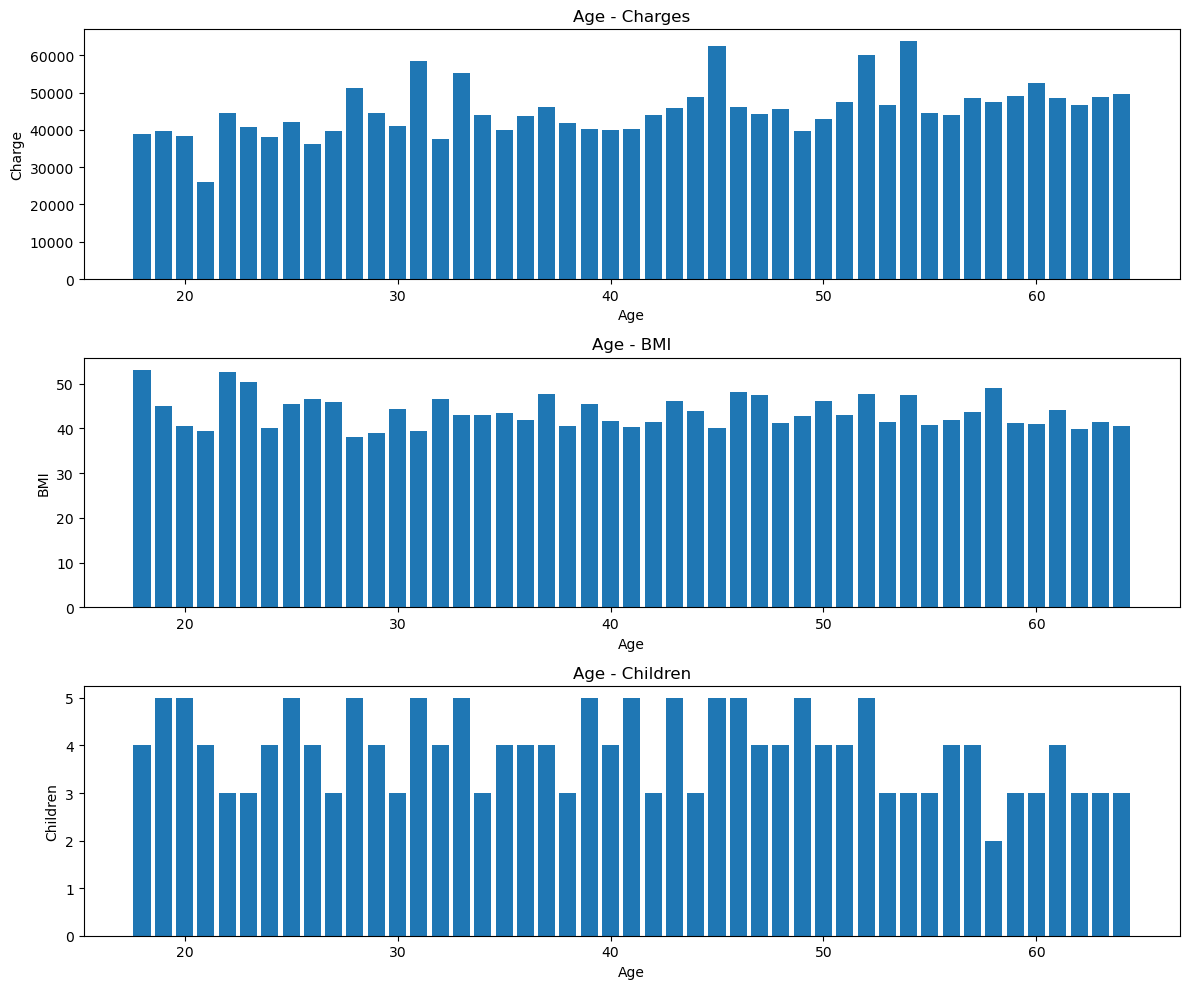

In [11]:
#subplots bar
fig, axs = plt.subplots(3, figsize=(12,10))

axs[0].bar(dataset['age'], dataset['charges'])
axs[0].set_title('Age - Charges')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Charge')

axs[1].bar(dataset['age'], dataset['bmi'])
axs[1].set_title('Age - BMI')
axs[1].set_xlabel('Age')
axs[1].set_ylabel('BMI')

axs[2].bar(dataset['age'], dataset['children'])
axs[2].set_title('Age - Children')
axs[2].set_xlabel('Age')
axs[2].set_ylabel('Children')

plt.tight_layout()

plt.show()

In [12]:
#female and male smokers
dataset.groupby(['smoker', 'sex']).size().unstack()

sex,female,male
smoker,,
no,1134,1074
yes,232,332


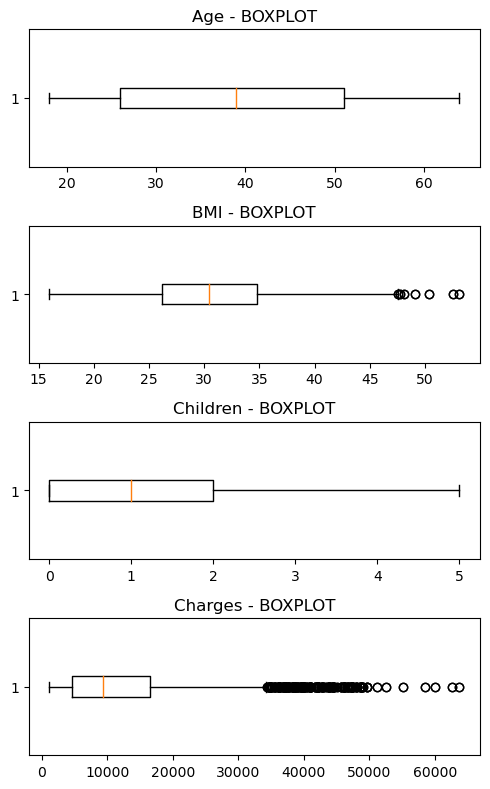

In [13]:
#subploits boxplots
fig, axs = plt.subplots(4, figsize=(5,8))

axs[0].boxplot(dataset['age'], vert=False)
axs[0].set_title('Age - BOXPLOT')

axs[1].boxplot(dataset['bmi'], vert=False)
axs[1].set_title('BMI - BOXPLOT')

axs[2].boxplot(dataset['children'], vert=False)
axs[2].set_title('Children - BOXPLOT')

axs[3].boxplot(dataset['charges'], vert=False)
axs[3].set_title('Charges - BOXPLOT')

plt.tight_layout()

plt.show()

# Training the model

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
categorical_columns = dataset.select_dtypes(include=['object']).columns

# One-hot encode categorical columns
dataset = pd.get_dummies(dataset, columns=categorical_columns, drop_first=True)

In [15]:
X = dataset.drop('charges', axis=1)
y = dataset['charges']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

ValueError: could not convert string to float: 'male'

In [ ]:
# Instantiate the model
model = DecisionTreeRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')

In [ ]:
# Define a sample data input
sample_data = {
    'age': [30],  # Example age value
    'sex': ['female'],  # Example sex value
    'bmi': [25.3],  # Example BMI value
    'children': [2],  # Example children count
    'smoker': ['no'],  # Example smoker status
    'region': ['northeast']  # Example region
}

# Convert sample data to a DataFrame
X_new = pd.DataFrame(sample_data)

# One-hot encode the sample data
X_new = pd.get_dummies(X_new, columns=['sex', 'smoker', 'region'])

# Fill missing columns with 0 to match the training data
expected_columns = ['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']
for col in expected_columns:
    if col not in X_new.columns:
        X_new[col] = 0

# Reorder the columns to match the order of the training data
X_new = X_new[expected_columns]

X_new = scaler.transform(X_new)

# Use the trained model to predict the target variable
y_pred = model.predict(X_new)

print(f'Predicted charges for the sample data: ${y_pred[0]:.2f}')